# 下載Minst資料

## Step.1 匯入 tensorflow 模組

In [1]:
import tensorflow as tf

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Step.2 匯入 tensorflow 讀取 MINST 資料集模組

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

## Step.3 第一次執行會下載 minst 資料

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Step.4 讀取 mnist 資料

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Step.5 查看 mnist 資料

In [5]:
print('train', mnist.train.num_examples,
     ',validation', mnist.validation.num_examples,
     ',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


以上執行結果，可以看到資料分為三部分:
    
    train:訓練資料55000筆
    
    validation:驗證資料5000筆
        
    test:測試資料10000筆

# 查看訓練資料

## Step.1 訓練資料是由images 與 labels所組成

In [6]:
print('train images : ',mnist.train.images.shape,
     'lables : ',mnist.train.labels.shape)

train images :  (55000, 784) lables :  (55000, 10)


## Step.2 查看第0筆images影像的長度 

以len函數查看第0筆images影像的長度，可以看到共784個數字。

In [7]:
len(mnist.train.images[0])

784

## Step.3 查看第0筆images影像的內容

TensorFlow 已經進行標準化，數值皆介於0~1之間，不須再標準化。

In [8]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Step.4 定義plot_image 函數顯示影像

為了能夠顯示圖形，建立下列plot_image函數。

In [9]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

## Step.5 執行plot_image函數

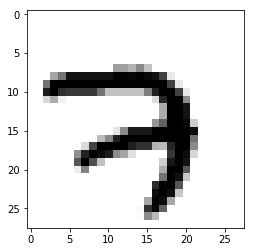

In [10]:
plot_image(mnist.train.images[0])

## Step.6 查看訓練標籤labels資料

下列程式碼顯示訓練資料的第0筆資料:由0算起第7個數字是1，其餘都是0，所以此數字為7。

使用One-hot encoding的原因是後續我們要建立的類神經網路的輸出層，

輸出層共10個神經元y0~y9，分別對應到0~9

In [11]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Step.7 使用argmax顯示數字

使用np.argmax轉換為0~9的數字

In [12]:
import numpy as np
np.argmax(mnist.train.labels[0])

7

# 查看多筆訓練資料 images 與 label

## Step.1 建立 plot_images_labels_prediction() 函數

In [13]:
import matplotlib.pyplot as plt

def plot_image_labels_prediction(images, labels, prediction, idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)), cmap='binary')
        title = "label=" + str(np.argmax(labels[idx]))
        if len(prediction)>0:  
            title+=",prediction= "+str(prediction[idx])  
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()


## Step.2 查看訓練資料前10筆資料

執行 plot_images_labels_prediction() 顯示訓練資料前10筆

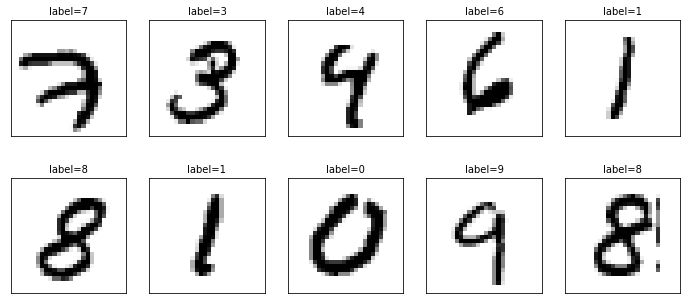

In [14]:
plot_image_labels_prediction(mnist.train.images,mnist.train.labels,[],0)

## Step.3 查看validation資料筆數

以下程式碼查看validation資料筆數共5000筆。

In [15]:
print('validation images : ',mnist.validation.images.shape,
     'lables : ',mnist.validation.labels.shape)

validation images :  (5000, 784) lables :  (5000, 10)


## Step.4 查看validation資料

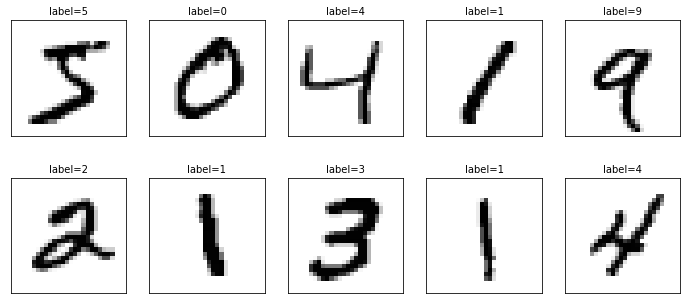

In [16]:
plot_image_labels_prediction(mnist.validation.images,mnist.validation.labels,[],0)

## Step.5 查看test 資料筆數

In [17]:
print('validation images : ',mnist.test.images.shape,
     'lables : ',mnist.test.labels.shape)

validation images :  (10000, 784) lables :  (10000, 10)


## Step.4 查看test資料

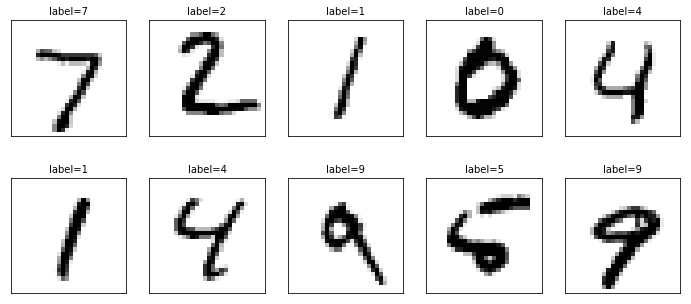

In [18]:
plot_image_labels_prediction(mnist.test.images,mnist.test.labels,[],0)

# 批次讀取 Mnist 資料

## Step.1 讀取批次資料

以下程式碼使用mnist.train.next_batch 方法，傳入參數batch_size = 100，

每次只讀取100筆批次訓練資料。讀取的結果會儲存在batch_images_xs,batch_labels_ys。

In [19]:
batch_images_xs,batch_labels_ys = mnist.train.next_batch(batch_size=100)

## Step.2 查看批次資料筆數

查看批次訓練資料的筆數是100筆。

In [20]:
print(len(batch_images_xs),
     len(batch_labels_ys))

100 100


## Step.3 查看批次資料

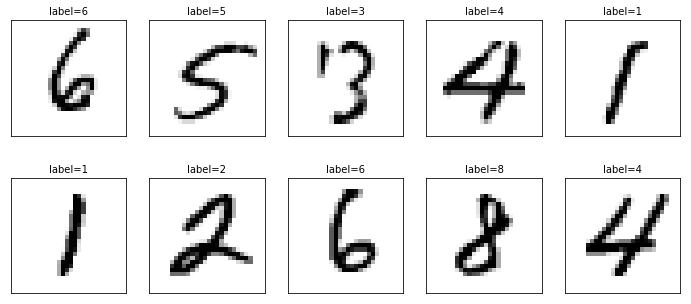

In [21]:
plot_image_labels_prediction(batch_images_xs,batch_labels_ys,[],0)

# 建立模型

Keras與TensorFlow建立模型方式不同如下:
    
    Keras建立模型:只需使用model = Sequential() 建立線性堆疊模型，再使用model.add()方法，
                 將各神經網路層加入模型即可。
            
    TensorFlow建立模型:必須自行定義layer函數(處理張量運算)，然後使用layer函數建構多層感知器模型。

## Step.1 建立layer函數

建構多層感知器 Multilayer perceptron 模型

In [22]:
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs, W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

## Step.2 建立輸入層x

使用tf.placeholder 方法建立輸入層(X)，placeholder 是 TensorFlow 計算圖的輸入，後續在訓練時，後續在訓練時，
會傳入數字影像資料。

In [23]:
x = tf.placeholder("float",[None,784])

## Step.3 建立隱藏層 h1

In [24]:
h1 = layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)

## Step.4 建立隱藏層 h2

In [25]:
h2 = layer(output_dim=1000,input_dim=1000,inputs=h1,activation=tf.nn.relu)

## Step.5 建立輸出層 y

In [26]:
y_predict = layer(output_dim=10,input_dim=1000,inputs=h2,activation=None)

# 定義訓練方式

keras定義訓練方式:只需使用model.compile，設定損失函數(loss function)，最優化方法(optimizer)，以及metrics設定評估模型的方式。

TensorFlow定義訓練方式:必須自行定義損失函數(loss function)的公式，最優化方法(optimizer)及設定參數，以及定義評估模型的準確率的公式。

## Step.1 建立訓練資料label真實值的placeholder

In [27]:
y_label = tf.placeholder("float",[None,10])

## Step.2 定義 loss function

In [28]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits_v2
                    (logits=y_predict, labels=y_label))

## Step.3 定義optimizer最優化方法

In [29]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

# 定義評估模型的準確率方式

## Step.1 計算每一筆資料是否預測正確

In [30]:
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

## Step.2 將計算預測正確結果平均

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 進行訓練

Keras進行訓練: 只需要使用model.fit，即可開始訓練。

TensorFlow進行訓練: 必須撰寫程式碼，控制訓練的每一個過程。

## Step.1 定義訓練參數

In [32]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
loss_list=[];epoch_list=[];accuracy_list=[]
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Step.2 進行訓練

In [33]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,
                                                           y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:",'%02d' %(epoch+1),"Loss=",
            "{:.9f}".format(loss),"Accuracy=",acc)
    
duration = time()-startTime
print("Train Finished takes:",duration)

Train Epoch: 01 Loss= 138.597259521 Accuracy= 0.9148
Train Epoch: 02 Loss= 92.963157654 Accuracy= 0.9354
Train Epoch: 03 Loss= 76.639801025 Accuracy= 0.9456
Train Epoch: 04 Loss= 71.950210571 Accuracy= 0.9482
Train Epoch: 05 Loss= 63.143329620 Accuracy= 0.9512
Train Epoch: 06 Loss= 69.804481506 Accuracy= 0.9512
Train Epoch: 07 Loss= 52.942043304 Accuracy= 0.9594
Train Epoch: 08 Loss= 64.384216309 Accuracy= 0.954
Train Epoch: 09 Loss= 53.985473633 Accuracy= 0.9618
Train Epoch: 10 Loss= 62.489974976 Accuracy= 0.9576
Train Epoch: 11 Loss= 56.920055389 Accuracy= 0.9608
Train Epoch: 12 Loss= 50.861537933 Accuracy= 0.962
Train Epoch: 13 Loss= 56.411132812 Accuracy= 0.9652
Train Epoch: 14 Loss= 51.517810822 Accuracy= 0.9662
Train Epoch: 15 Loss= 55.475769043 Accuracy= 0.9658
Train Finished takes: 87.77339005470276


## Step.3 畫出loss誤差執行結果

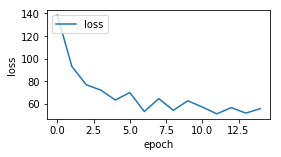

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

## 畫出accuracy執行結果

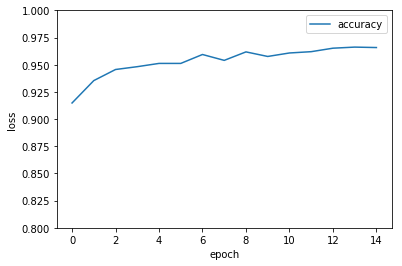

In [35]:
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.ylim(0.8,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

# 評估模型準確率

## Step.1 評估模型準確率

In [36]:
print("val Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))

val Accuracy: 0.9642


# 進行預測

## Step.1 執行預測

In [37]:
prediction_result = sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

## Step.2 預測結果

查看預測結果前10筆

In [38]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

## Step.3 顯示前10筆預測結果

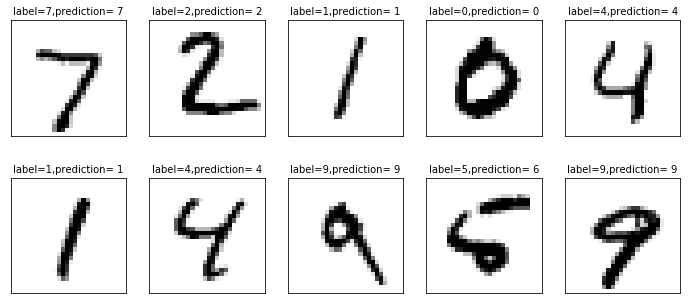

In [39]:
plot_image_labels_prediction(mnist.test.images,
                            mnist.test.labels,
                            prediction_result,0)